<h2> Business Problem </h2>

<h3>Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries. </h3>

In [ ]:
%%shell
jupyter nbconvert --to html /content/Final_stream_f.ipynb

[NbConvertApp] Converting notebook /content/Final_stream_f.ipynb to html
[NbConvertApp] Writing 1396482 bytes to /content/Final_stream_f.html


In [ ]:
# Importing all the libraries that we will need for this EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Downloading the data from the specified location
!gdown 1pD4RPfeHcurGslvhlgehhD0tOVQ7ZCTn

Downloading...
From: https://drive.google.com/uc?id=1pD4RPfeHcurGslvhlgehhD0tOVQ7ZCTn
To: /content/rw_nf_data.csv
100% 3.40M/3.40M [00:00<00:00, 22.2MB/s]


In [ ]:
#Loading the data set in to the dataframe from the source.
data = pd.read_csv("rw_nf_data.csv")

In [ ]:
#checking the top 5 data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h2> Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary. </h2>

In [ ]:
# This gives the shape of the data - we have 8807 rows and 12 columns
data.shape

(8807, 12)

In [ ]:
# The dimension of the data is 2
data.ndim

2

In [ ]:
# Here we find out the column names of he data
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Here we find out the data types of all the columns in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Here we find out the statical summary befor cleaning the data
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Data Cleaning means the process of identifying incorrect, incomplete, inaccurate, irrelevant, or missing pieces of data and then modifying, replacing, or deleting them as needed. Data Cleansing is considered as the basic element of Data Science.

In [ ]:
# Missing values detection columnwise
data.isnull().any()


show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
# Here we look at the number of missing or null values in each column
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Now we will replace all the missing values in categorical columns with
# unknown colmn names
data.director.fillna("unknown director", inplace=True)
data.cast.fillna("unknown cast", inplace=True)
data.country.fillna("unknown country", inplace=True)


In [ ]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
#Now for the rest of columns, the data is pretty small that has null values
# so we will just get rid of these.

data.dropna(inplace=True)

In [ ]:
#Now we do not have any null values and we can proceed with the EDA
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   object        
 7   release_year  8790 non-null   datetime64[ns]
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 824.2+ KB


# 1. Find the counts of each categorical variable both using graphical and non-graphical analysis.

Analysis of Categorical Variable = Type

In [ ]:
# Non Graphical Analysis - Value Count Of Type
data["type"].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

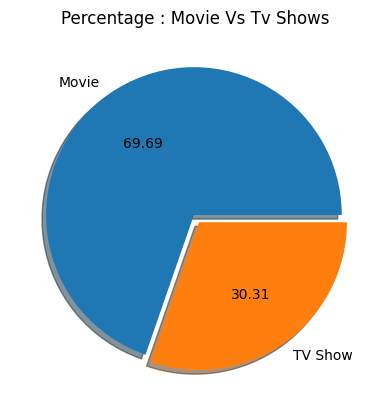

In [ ]:
# #Graphical in Type,  Univariate Analysis

data.groupby('type').size().plot(kind='pie', autopct="%.2f", explode=[0.01, 0.05],  shadow=True, title='Percentage : Movie Vs Tv Shows')
plt.show()


***Analysis*** - Quantity: Our analysis revealed that Netflix had added more movies than TV shows, aligning with the expectation that movies dominate their content library.

***Recommendations*** - Netflix could try and focus more on TV Shows also because there are people who will like to see tv shows rather than movies

1- B) #Analysis on Nuumber of titles released every year in the last 30 years As a Part of Bivariate Analysis

In [ ]:
#For Non Graphical Calculation
# Convert 'release_year' to datetime
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y')

#taking out max year from the date
max_year = data.release_year.dt.year.max()

#filtering out movies and tv data for the last 30 years
last30yrs = data[data.release_year.dt.year>(max_year-30)]

#filtering out only Movie data
last30yrsmoviesfilter = last30yrs[last30yrs['type'] == 'Movie']

#finding the exact count of the movies in the last 30 years
last30yrsmovies = last30yrsmoviesfilter.groupby(last30yrs['release_year'].dt.year)['show_id'].count()

#non graphocal analysis of the movie data
last30yrsmovies.sort_values( ascending = False)

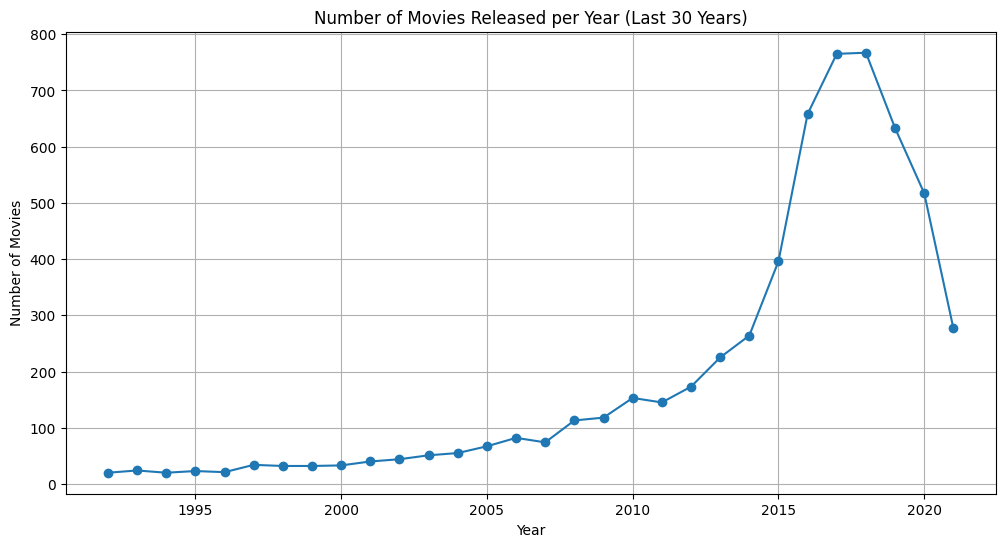

In [ ]:
# For Graphical Analysis
# Create a line plot to visualize the trend
plt.figure(figsize=(12, 6))
plt.plot(last30yrsmovies.index, last30yrsmovies.values, marker='o', linestyle='-')
plt.title('Number of Movies Released per Year (Last 30 Years)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

***Analysis*** - The line chart illustrates the number of movies added to Netflix over time. It visually represents the growth and trends in content additions.

Netflix saw its real growth starting from the year 2015, & we can see it added several Movies over the years.

Also, it is interesting that the movie content addition dropped in 2020. This could be due to the pandemic situation.

***Recommendations*** - Netflix can try to match the number of movies released in previous years to keep the user engagement high.

1-C) For categorical variable(s): Boxplot

Analysing the duration distribution for movies and TV shows allows us to understand the
typical length of content available on Netflix. We can create box plots to visualize these
distributions and identify outliers or standard durations.

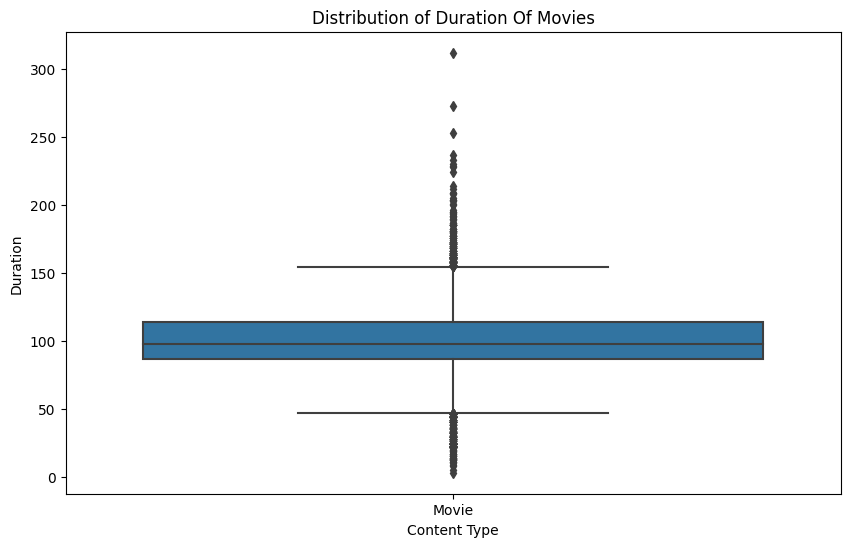

In [ ]:
dmovies = data[data.type.str.contains("Movie")]
#data['duration'] = data['duration'].str.extract('(\d+)',expand=False).astype(int)
# Creating a boxplot for movie duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=dmovies, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration Of Movies')
plt.show()

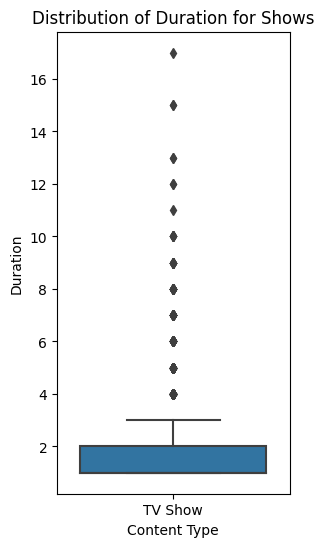

In [ ]:
dtvshow = data[data.type.str.contains("TV Show")]
#netflix_shows_df['duration'] = netflix_shows_df['duration'].str.extract('(\d+)',expand=False).astype(int)

# Creating a boxplot for movie duration
plt.figure(figsize=(3, 6))
sns.boxplot(data=dtvshow, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Shows')
plt.show()

***Analysis*** -
Analysing the movie box plot, we can see that most movies fall within a reasonable duration range, with few outliers exceedingly approximately 2.5 hours. This suggests that most movies on Netflix are designed to fit within a standard viewing time.

For TV shows, the box plot reveals that most shows have one to four seasons, with very few
outliers having longer durations. This aligns with the earlier trends, indicating that Netflix
focuses on shorter series formats.

***Recommendations*** - Netflix can keep following the trends when it comes to the duration of TV Shows and Movies.

# 2 - Comparison of tv shows vs. movies.

2-a) Find the number of movies produced in each country and pick the top 10
countries.

In [ ]:
#unnesting the country column as it contains multiple comma seperated entries
udata["split_country"] = udata.country.str.split(", ")

In [ ]:
udata = udata.explode("split_country", ignore_index= True)

In [ ]:
#Finding the contries where highest number of movies were released, this is excluding the "unknown country"
filtered_countries_Movie= udata.loc[(udata.type=="Movie") & (udata.split_country!="unknown country")].groupby("split_country").show_id.nunique().sort_values(ascending= False).head(10)

In [ ]:
filtered_countries_Movie

split_country
United States     2748
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: show_id, dtype: int64

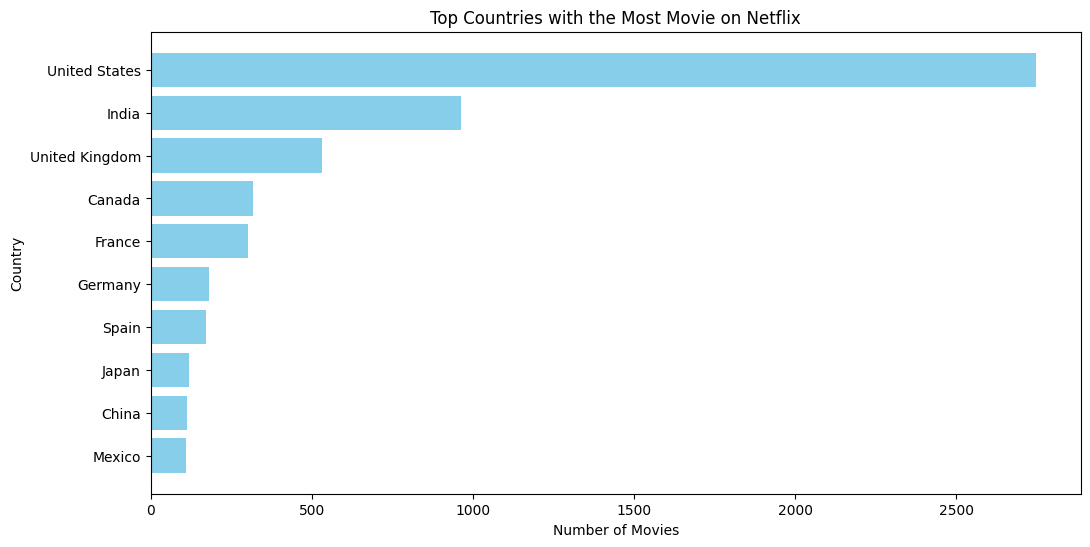

In [ ]:
# Create a bar plot to visualize the top countries by the number of Movies
plt.figure(figsize=(12, 6))
plt.barh(filtered_countries_Movie.index, filtered_countries_Movie.values, color='skyblue')
plt.title('Top Countries with the Most Movie on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.gca().invert_yaxis() # Reverse the y-axis to show the highest count at the top
plt.show()

***Analysis*** - Netflix has a pretty concentrated presence in a few countries when it comes to movies.

***Recommendations*** -
It can go ahead and start creating movies for other regions so that its reach sees an increase and new viewers are added from other countries as well.

2-B) Find the number of Tv-Shows produced in each country and pick the top 10
countries.

In [ ]:
#Finding the contries where highest number of TV Show were released, this is excluding the "unknown country"
filtered_countries_TV_Show= udata.loc[(udata.type=="TV Show") & (udata.split_country!="unknown country")].groupby("split_country").show_id.nunique().sort_values(ascending= False).head(10)

In [ ]:
filtered_countries_TV_Show

split_country
United States     932
United Kingdom    271
Japan             197
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          64
Spain              61
Name: show_id, dtype: int64

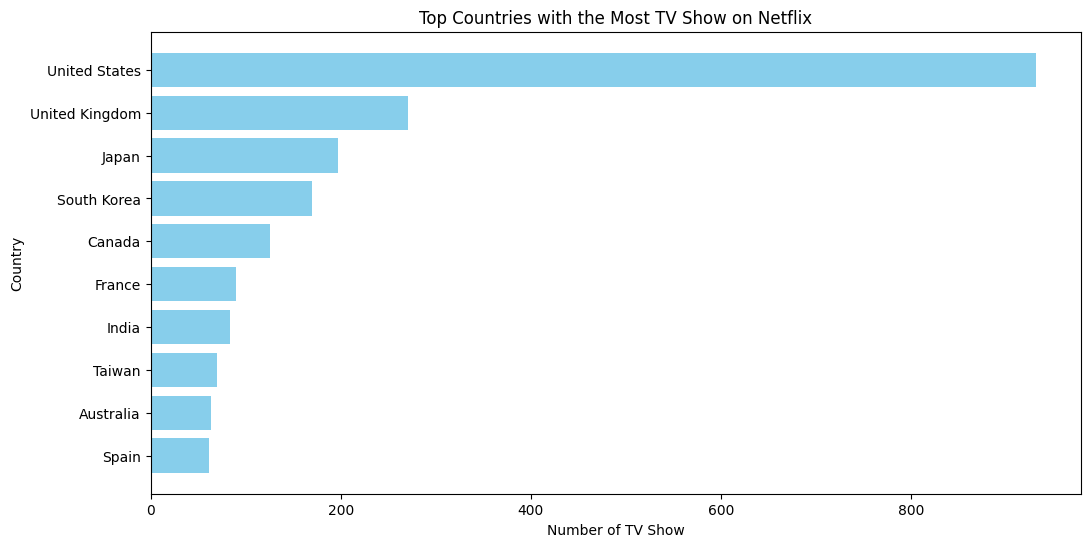

In [ ]:
# Create a bar plot to visualize the top countries by the number of TV Show
plt.figure(figsize=(12, 6))
plt.barh(filtered_countries_TV_Show.index, filtered_countries_TV_Show.values, color='skyblue')
plt.title('Top Countries with the Most TV Show on Netflix')
plt.xlabel('Number of TV Show')
plt.ylabel('Country')
plt.gca().invert_yaxis() # Reverse the y-axis to show the highest count at the top
plt.show()

***Analysis*** - Netflix has a pretty concentrated presence in a few countries when it comes to TV Shows as well.

***Recommendations*** -
It can go ahead and start creating TV Shows for other regions so that its reach sees an increase and new viewers are added from other countries as well.

# 3 - What is the best time to launch a TV show?

In [ ]:
# Convert 'date_added' column to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

In [ ]:
# Extract the year from the 'date_added' column
data['year_added'] = data['date_added'].dt.year

In [ ]:
# Extract the month from the 'date_added' column
data['month_added'] = data['date_added'].dt.month

In [ ]:
# Extracting the week number from the 'date_added' column
data['Week'] = data['date_added'].dt.isocalendar().week

3-A-1) Find which is the best week to release the movie.

In [ ]:
# finding out the week Number in which most number of movies were released
data.loc[data.type=="Movie"].groupby("Week").show_id.count().sort_values(ascending= False)

Week
1     316
44    243
40    215
9     206
26    195
35    189
31    185
13    174
18    173
27    154
22    146
48    139
5     135
16    124
14    123
50    119
30    116
11    115
37    113
23    112
39    111
17    109
10    107
7     106
33    104
34    102
25    101
15    100
36     97
49     95
29     94
42     90
28     89
24     89
38     88
43     88
51     86
20     85
47     85
41     84
46     83
3      81
52     80
2      78
21     76
32     73
19     73
8      72
12     67
6      64
45     61
53     61
4      55
Name: show_id, dtype: int64

3-A-2) Find which is the best week to release the TV Show.

In [ ]:
# finding out the Week number in which most number of TV Show were released
data.loc[data.type=="TV Show"].groupby("Week").show_id.count().sort_values(ascending= False).index[0]

27

***Analysis*** - When it comes to the spcific week,
for movies, it is the 1st week, in which most of the movies has been released by the netflix over the years.

On the other hand, when it comes to the TV shows, Netflix releases more Tv shows in the 27th week, which is close to mid of the year.

3-B-1) Find which is the best month to release the Movie.

In [ ]:
# finding out the best month in which most number of Movies were released
data.loc[data.type=="Movie"].groupby("month_added").show_id.count().sort_values(ascending= False).index[0]

7

3-B-2) Find which is the best month to release the Tv-show.

In [ ]:
# finding out the best month in which most number of TV Show were released
data.loc[data.type=="TV Show"].groupby("month_added").show_id.count().sort_values(ascending= False).index[0]

12

***Analysis*** -
After analysiing the monthly data, it could be concluded that most of the movies are released in the month of july.

on the other hand, most of the TV shows are released in the year end.

# 4 - Analysis of actors/directors of different types of shows/movies.

4.A) - Identify the top 10 directors who have appeared in most movies or TV shows.

In [ ]:
#creating a new dataframe with unnested vales named as udata
udata = data

In [ ]:
#unnesting the director column and creating a new column "split_director"
udata["split_director"] = udata.director.str.split(", ")

In [ ]:
#exploding the split_director column to unnest
udata = udata.explode("split_director", ignore_index = True)

In [ ]:
top_10_directors = udata[udata.split_director!="unknown director"].groupby("split_director").show_id.count().sort_values(ascending = False).head(10)

In [ ]:
top_10_directors

split_director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: show_id, dtype: int64

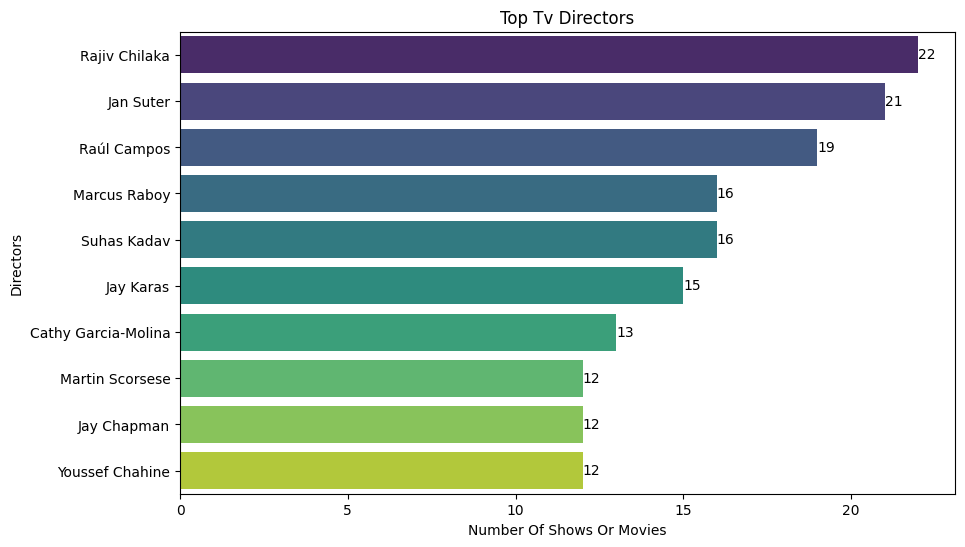

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='viridis')
plt.title('Top Tv Directors')
plt.xlabel("Number Of Shows Or Movies")
plt.ylabel("Directors")
for i in ax.containers:
	ax.bar_label(i,)
#ax.margins(x=0)

plt.show()

***Analysis*** - Netflix has the above listed top 10 directors, they can focus on more number of directors to capture a larger audience base and higher profit margins.

4.B) - Identify the top 10 Actors who have appeared in most movies or TV shows.

In [ ]:
#unnesting the Actor column and creating a new column "split_actor"
udata["split_cast"] = udata.cast.str.split(", ")

In [ ]:
udata

In [ ]:
#exploding the split_cast column to unnest
udata = udata.explode("split_cast", ignore_index = True)

In [ ]:
top_10_actors = udata[udata.split_cast!="unknown cast"].groupby("split_cast").show_id.count().sort_values(ascending = False).head(10)

In [ ]:
top_10_actors

split_cast
Anupam Kher         43
Julie Tejwani       39
James Franco        37
Rupa Bhimani        37
Takahiro Sakurai    36
Shah Rukh Khan      35
Yuki Kaji           34
Naseeruddin Shah    34
Kristen Bell        33
Tara Strong         32
Name: show_id, dtype: int64

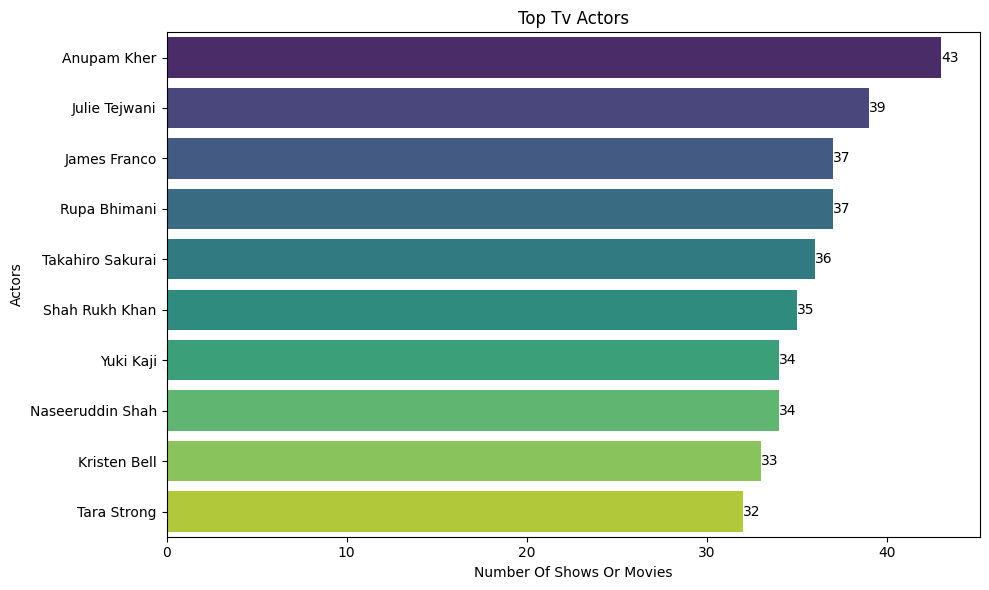

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('Top Tv Actors')
plt.xlabel("Number Of Shows Or Movies")
plt.ylabel("Actors")
plt.tight_layout()
plt.show()

***Analysis*** - Netflix has the above listed top 10 Actors, they can focus on more number of actors to capture a larger audience base and higher profit margins.

# 5 - Which genre movies are more popular or produced more

In [ ]:
udata["split_listed_in"] = udata.listed_in.str.split(", ")

In [ ]:
udata = udata.explode("split_listed_in", ignore_index=True)

In [ ]:
umdata = udata[udata.type=="Movie"]

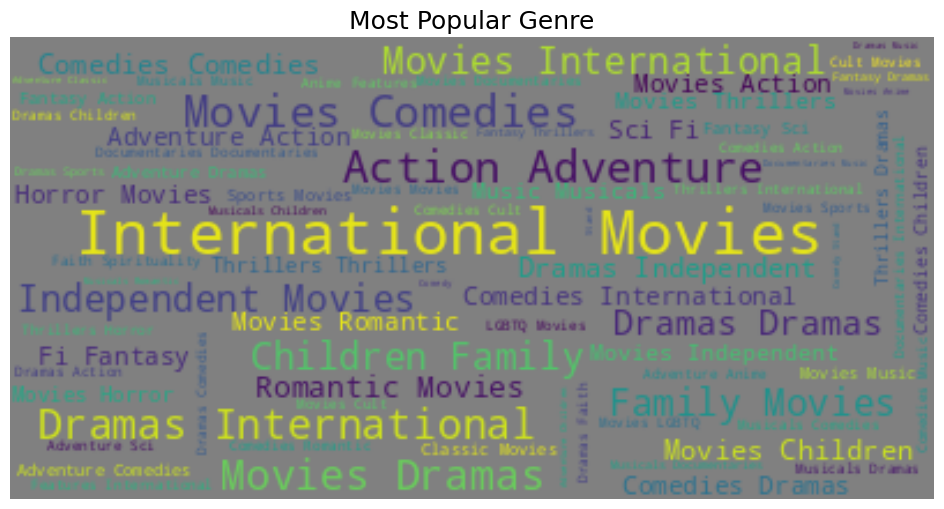

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in umdata.split_listed_in)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="gray").generate(text)
plt.figure(figsize=(12,6))
#plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Genre',fontsize = 18)
plt.axis("off")
plt.show()

***Analysis*** - Shown above are some of the most common Genre of movies that are produced more than others.

## 6) Find After how many days the movie will be added to Netflix after the release of the movie.

In [ ]:
#filtering only movies out of whole data and for recent years, we have taken years from 2017 and above
mdata = mdata.loc[(data.type=="Movie") & (data.release_year.dt.year>2016)]

In [ ]:
#now we will find the difference in the number of days between the release date and netflix addition date
mdata['datedif'] = mdata.date_added - mdata.release_year

In [ ]:
#by taking mod of the datedif column, we are able to conclude that it takes about 334 days for netflix to add the movie
mdata.datedif.mode()[0]

Timedelta('334 days 00:00:00')

***Analysis - *** With the above comutation, it seems that in about 334 days, a movie is added to the netflix after its release.
This sample data for this analysis has been taken from the year 2017.

<center> THE END!</h2></center>

